Lets take a look how you can use sampling distributin to build confidence interval to estimate difference in two parameter

#### Question: What is the difference in the mean height for coffee vs no coffee drinkers? ####

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

In [65]:
coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200)

In [66]:
coffee_full.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [67]:
coffee_red.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [68]:
#let draw a sample of 200 from coffee_red and find out the mean height of who drinks cofee and dont drink coffee
bootsample = coffee_red.sample(200, replace = True)
mean_coff = bootsample[bootsample['drinks_coffee'] == True] ['height'].mean()
mean_nocoff = bootsample[bootsample['drinks_coffee'] == False]['height'].mean()

In [69]:
boot_sample

,user_id,age,drinks_coffee,height
101,4635,>=21,True,66.753843
630,6979,>=21,True,71.237836
913,4692,>=21,True,68.961405
166,6300,<21,True,66.209156
1356,5800,>=21,True,68.057465
...,...,...,...,...
2126,1871,<21,False,73.513687
2864,3670,>=21,True,66.859636
2349,7846,>=21,True,68.186863
168,7839,>=21,True,69.408458


In [70]:
mean_coff

68.25918199231297

In [71]:
mean_nocoff

66.28588551349722

In [72]:
#now build a list ans store the mean difference vaules and do this same for 10000 times
diff = []
for _ in range(10000):
    bootsample = coffee_red.sample(200, replace = True)
    mean_coff = bootsample[bootsample['drinks_coffee'] == True]['height'].mean()
    mean_nocoff = bootsample[bootsample['drinks_coffee'] == False]['height'].mean()
    diff.append(mean_coff - mean_nocoff)   

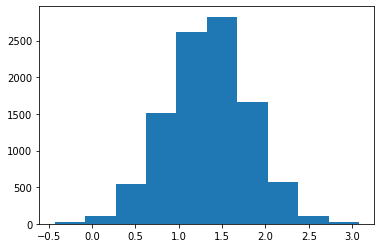

In [75]:
#plot a histogram to have alook
plt.hist(diff);

In [76]:
#cut off the bottom 2.5 and top 2.5 to build 95% confidence interval
np.percentile(diff, 2.5),np.percentile(diff, 97.5)

(0.3965686790909317, 2.243258868112464)

In this we built a confidence interval for the difference of the average heights for coffee drinkers and non-coffee drinkers. The interval was built at a 95% confidence level, and since the difference did not contain zero, this suggested there was truly a difference in the average heights in the population of coffee drinkers as compared to non-coffee drinkers.

Specifically, we can be 95% confident that the difference in the average heights for coffee drinkers as compared to non-coffee drinkers was in the provided interval of 0.39 to 2.24 inches.

Notice the similarity of the wording to the last confidence interval you built. The highlighted portions signify the two parts that can change in your conclusions:

The confidence level.
The parameter you are capturing with your interval.